## Introduction
### Data Description
>The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined

### Question(s) for Analysis
><ol>
    <li> which products is the most and the least sales?</li>
    <li> which tire that is the most revenue?</li>
    <li> what is frequency distributions for the Maximum Retail Price?</li>
    <li> what is frequency distributions for  the Maximum Item Visibility?</li>
    <li> which outlet type that is the most revenue? </li>
    <li> What is the count of product types according to the location of the outlet type?</li>
    <li> which items category have most visiblty? </li>
</ol>

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you **document your data cleaning steps in mark-down cells precisely and justify your cleaning decisions.**


### General Properties
> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

In [56]:
#import package and load dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("train.csv")

In [57]:
#show data and attributes
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## type of data
<ul>
<li> 1) weight quintative continous </li>
<li> 2) Fat_Content categoral nominal </li>
<li> 3) Item_Visibility quintative continous </li>
<li> 4) Item_Type categoral nominal </li>
<li> 5) Item_MRP quintative continous </li>
<li> 6) Outlet_Identifier categoral nominal </li>
<li> 7) Outlet_Establishment_Year quantitative discrite </li>
<li> 8) Outlet_Size categorical ordinal </li>
<li> 9) Outlet_Location_Type categorical nominal </li>
<li> 10) Outlet_Type categorical nominal </li>
<li> 11) Item_Outlet_Sales quintative continous </li>
</ul>

### any column content nan value
><ol>
    <li> column item weight content Nan value and is numerical continuous</li>
    <li> column outlet size content Nan value and is categorical ordinal</li>
</ol>

In [58]:
# the total of column and row
df.shape

(8523, 12)

In [59]:
# know data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [60]:
# check any data type is Outlet Size 
type(df['Outlet_Size'][0])

str

### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [61]:
df.groupby('Outlet_Type')['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Size
Grocery Store      Small           528
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Supermarket Type2  Medium          928
Supermarket Type3  Medium          935
Name: Outlet_Size, dtype: int64

In [62]:
df.groupby('Outlet_Identifier')['Outlet_Size'].count()

Outlet_Identifier
OUT010      0
OUT013    932
OUT017      0
OUT018    928
OUT019    528
OUT027    935
OUT035    930
OUT045      0
OUT046    930
OUT049    930
Name: Outlet_Size, dtype: int64

In [63]:
df.groupby('Outlet_Identifier')['Outlet_Type'].value_counts()

Outlet_Identifier  Outlet_Type      
OUT010             Grocery Store        555
OUT013             Supermarket Type1    932
OUT017             Supermarket Type1    926
OUT018             Supermarket Type2    928
OUT019             Grocery Store        528
OUT027             Supermarket Type3    935
OUT035             Supermarket Type1    930
OUT045             Supermarket Type1    929
OUT046             Supermarket Type1    930
OUT049             Supermarket Type1    930
Name: Outlet_Type, dtype: int64

In [64]:
# fill NaN value for Item_Weight column
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [65]:
# fill NaN value for Outlet_Size column
df['Outlet_Size'].fillna("Small",inplace=True)

In [66]:
# show the data after changes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [67]:
# check if there find duplicate data
df.duplicated().sum()

0

In [68]:
# check number unique for column
df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [69]:
#check the value in Item_Fat_Content
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [70]:
# There are 2 categories of this attribute: ['Low Fat', 'Regular'].
# so replace the values To same like
df['Item_Fat_Content'].replace({'low fat':'Low Fat'},inplace=True)
df['Item_Fat_Content'].replace({'LF':'Low Fat'},inplace=True)
df['Item_Fat_Content'].replace({'reg':'Regular'},inplace=True)

In [71]:
#check the value in Item_Fat_Content after edit
df['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular'], dtype=object)

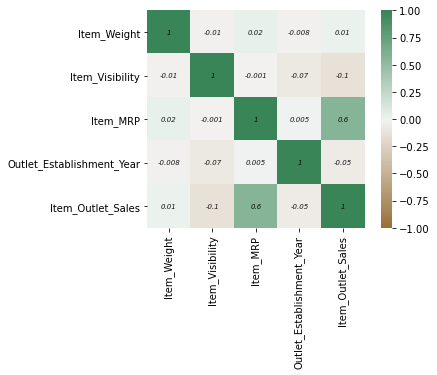

In [80]:
annot_kws={'fontsize':7, 'fontstyle':'italic',  'color':"k",'alpha':0.9, 'rotation':"horizontal",'verticalalignment':'center'}
sns.heatmap(df.corr(),vmin=-1, vmax=1, center=0,cmap=sns.diverging_palette(50, 500, n=500),square=True,annot=True,annot_kws=annot_kws,fmt=".1g")
plt.show()


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 


In [72]:
# describe dataset
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### Question 1) which products is the most and the least sales?

In [73]:
#function to get x_axis and y_axis
def x_axis(col1,col2):
    return df.groupby(col1)[col2].sum().index.values

def y_axis(col1,col2):
    return df.groupby(col1)[col2].sum().values    

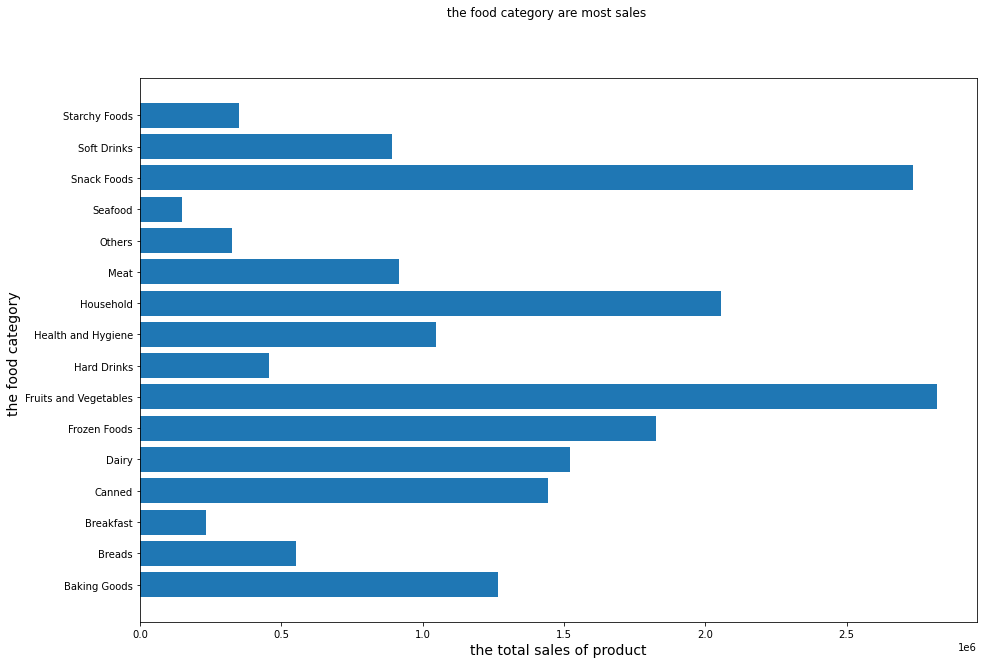

In [74]:
x = x_axis("Item_Type","Item_Outlet_Sales") 
y = y_axis("Item_Type","Item_Outlet_Sales")
plt.figure(figsize=(15,10))
plt.xlabel("the total sales of product",fontsize=14)
plt.ylabel("the food category ",fontsize=14)
plt.suptitle(" the food category are most sales")
plt.barh(x,y)
plt.show()

>Tip: Here is a list of the most profitable foods

### Question 2) which tire that is the most revenue?

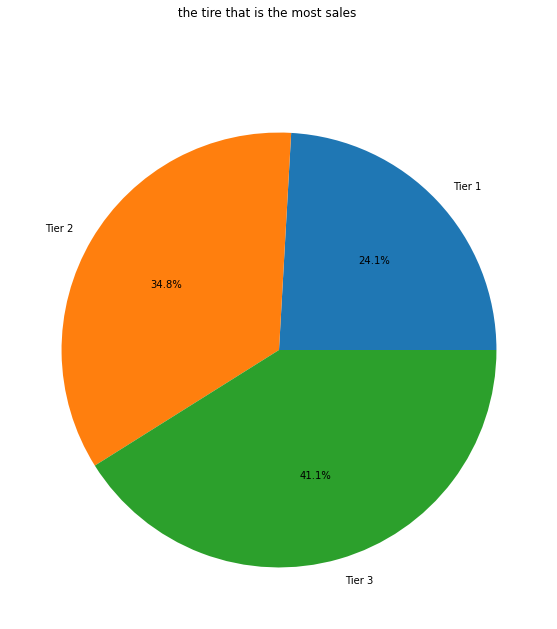

In [75]:
x = x_axis("Outlet_Location_Type","Item_Outlet_Sales") 
y = y_axis("Outlet_Location_Type","Item_Outlet_Sales") 
plt.figure(figsize=(15,10))
plt.suptitle(" the tire that is the most sales")
plt.pie(y,labels =x,autopct='%1.1f%%')
plt.show()

>Tip: Here show the tire the most profitable

### Question 3) what is frequency distributions for  the Maximum Retail Price?

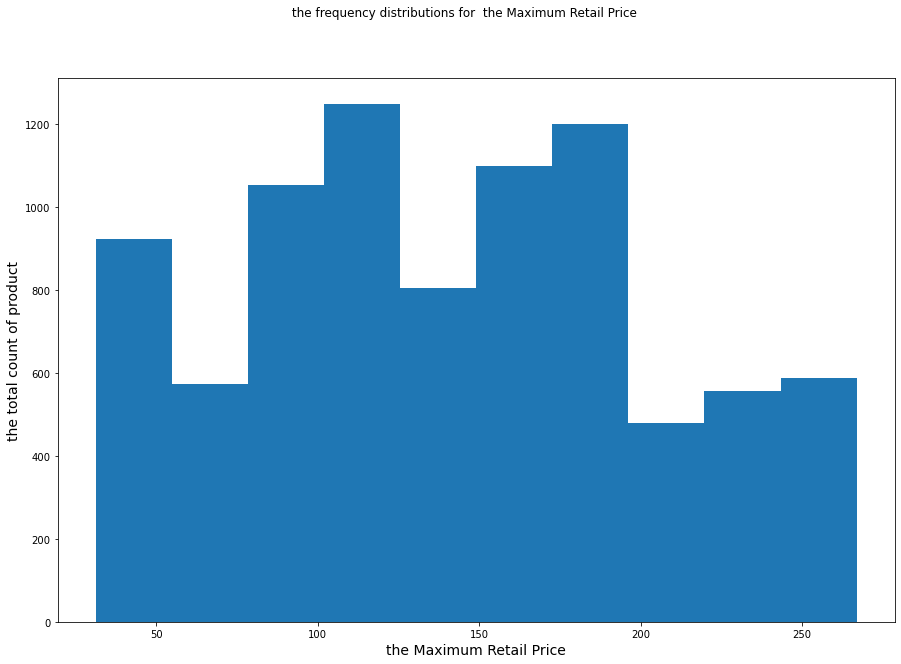

In [76]:
x = df["Item_MRP"].values
plt.figure(figsize=(15,10))
plt.xlabel("the Maximum Retail Price",fontsize=14)
plt.ylabel("the total count of product",fontsize=14)
plt.suptitle(" the frequency distributions for  the Maximum Retail Price")
plt.hist(x)
plt.show()

>Tip: Here show any Maximum Retail Price product The Big Mart owns 

### Question 4) what is frequency distributions for  the Maximum Item Visibility?

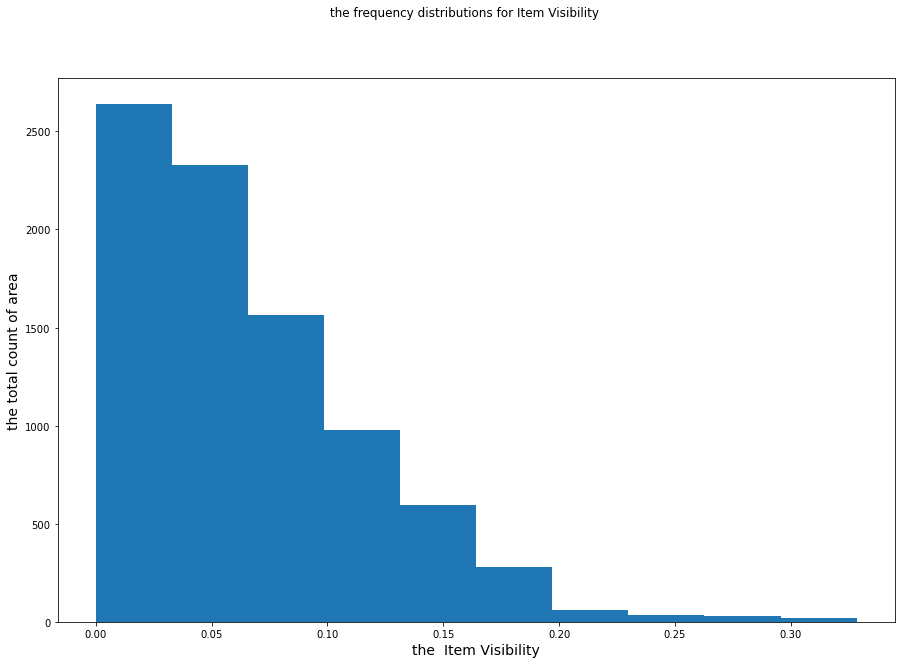

In [77]:
x = df["Item_Visibility"].values
plt.figure(figsize=(15,10))
plt.xlabel("the  Item Visibility",fontsize=14)
plt.ylabel("the total count of area",fontsize=14)
plt.suptitle(" the frequency distributions for Item Visibility")
plt.hist(x)
plt.show()

> Tip: the shape is right skewed or postive skewed

### Question 5) which outlet type that is the most revenue?

>Tip: Here show the outlet type the most profitable

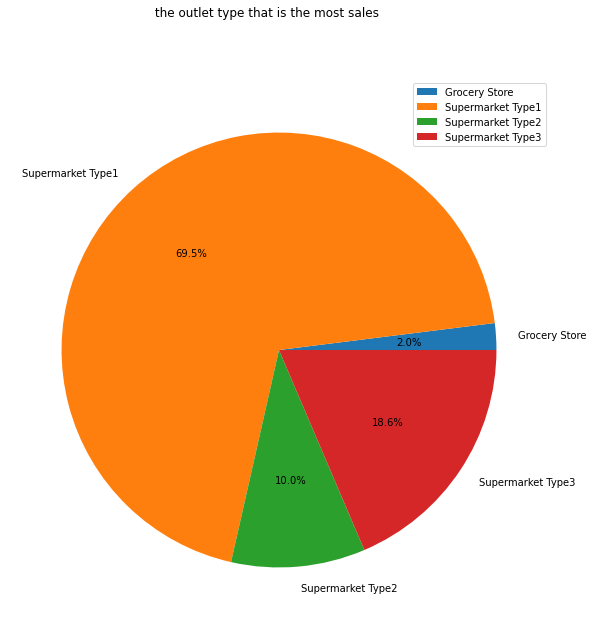

In [78]:
x = df.groupby("Outlet_Type")['Item_Outlet_Sales'].sum().index.values
y = df.groupby("Outlet_Type")['Item_Outlet_Sales'].sum().values
plt.figure(figsize=(15,10))
plt.suptitle(" the outlet type that is the most sales")
plt.pie(y,labels =x,autopct='%1.1f%%')
plt.legend()
plt.show()

## question 6) What is the count of product types according to the location of the outlet type?

In [79]:
df.groupby(by=['Outlet_Location_Type','Item_Type'])['Outlet_Location_Type'].count()

Outlet_Location_Type  Item_Type            
Tier 1                Baking Goods             185
                      Breads                    67
                      Breakfast                 33
                      Canned                   177
                      Dairy                    205
                      Frozen Foods             250
                      Fruits and Vegetables    337
                      Hard Drinks               58
                      Health and Hygiene       138
                      Household                250
                      Meat                     123
                      Others                    56
                      Seafood                   19
                      Snack Foods              334
                      Soft Drinks              120
                      Starchy Foods             36
Tier 2                Baking Goods             211
                      Breads                    84
                      Breakfast       

>Tip: Here know any tire the most count of type of products

## question 7) which items category have most visiblty?

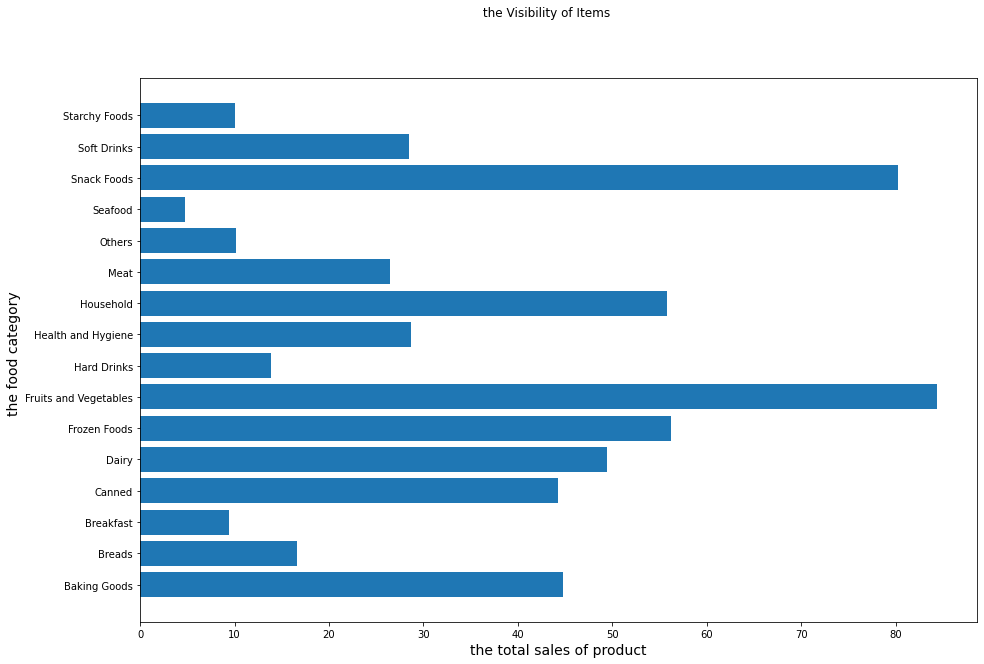

In [82]:
x = x_axis("Item_Type","Item_Visibility") 
y = y_axis("Item_Type","Item_Visibility")
plt.figure(figsize=(15,10))
plt.xlabel("the Visibility of product",fontsize=14)
plt.ylabel("the food category ",fontsize=14)
plt.suptitle(" the Visibility of Items")
plt.barh(x,y)
plt.show()

<a id='conclusions'></a>
## Conclusions
<ul>
<li> **Tip**: Fruits, Vegetables, Snack Foods, Household and Frozen Foods	the most sales </li>
<li> **Tip**: Tier 3 is the location that achieve most revenue   </li>
<li> **Tip**: The Maximum Retail Price product is between 93 : 185  </li>
<li> **Tip**: the percentage of total display area of all products in a store allocated is small</li>
<li> **Tip**: Supermarket Type 1,2 of Outlet Type is the most revenue</li>
<li> **Tip**: Fruits, Vegetables and Snack Foods are the most visibility product</li>
 <ul>    